# Stroke prediction EDA Notebook

In [93]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
import warnings

In [94]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Classifcation Datasets\\StrokeData.csv')

## Checking the top 5 rows

In [95]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Dropping Unwanted columns 

In [96]:
df=df.drop(columns='id')

In [97]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Replacing categorical values in words for EDA purpose

In [98]:
df['hypertension']=df['hypertension'].replace({0:'No',1:'Yes'})
df['heart_disease']=df['heart_disease'].replace({1:'Yes',0:'No'})
df['stroke']=df['stroke'].replace({1:'Yes',0:'No'})

## Checking for null values 

In [99]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Treating the null values 

In [100]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [101]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Hence the null values are removed

## Detecting Outliers by Plotting histograms for Continuous columns 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

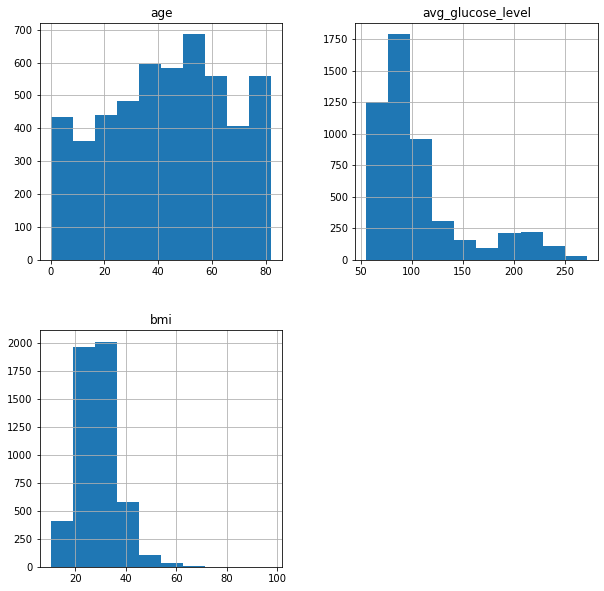

In [102]:
df.hist(figsize=(10,10))

No outliers in the data

In [103]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


## Description of continuous variables on Persons suffered stroke

In [104]:
df[df['stroke']=='Yes'].describe()

,age,avg_glucose_level,bmi
count,249.000000,249.000000,249.000000
mean,67.728193,132.544739,30.090361
std,12.727419,61.921056,5.861877
min,1.320000,56.110000,16.900000
25%,59.000000,79.790000,27.000000
50%,71.000000,105.220000,28.100000
75%,78.000000,196.710000,32.500000
max,82.000000,271.740000,56.600000


## Description of continuous variables on  Persons not suffered stroke

In [105]:
df[df['stroke']=='No'].describe()

,age,avg_glucose_level,bmi
count,4861.000000,4861.000000,4861.000000
mean,41.971545,104.795513,28.799115
std,22.291940,43.846069,7.777269
min,0.080000,55.120000,10.300000
25%,24.000000,77.120000,23.600000
50%,43.000000,91.470000,28.100000
75%,59.000000,112.830000,32.800000
max,82.000000,267.760000,97.600000


## Counting 

## Plotting Histograms

### Histogram for persons who suffered a stroke

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

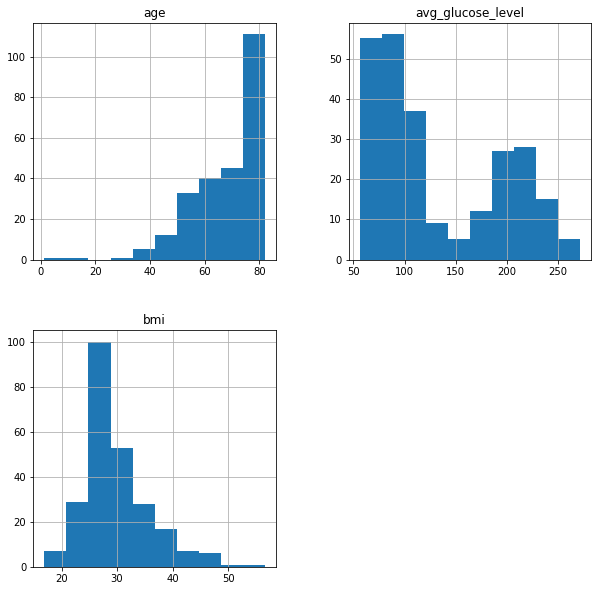

In [106]:
df[df['stroke']=='Yes'].hist(figsize=(10,10))

### Histogram for persons who did not suffer a stroke

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

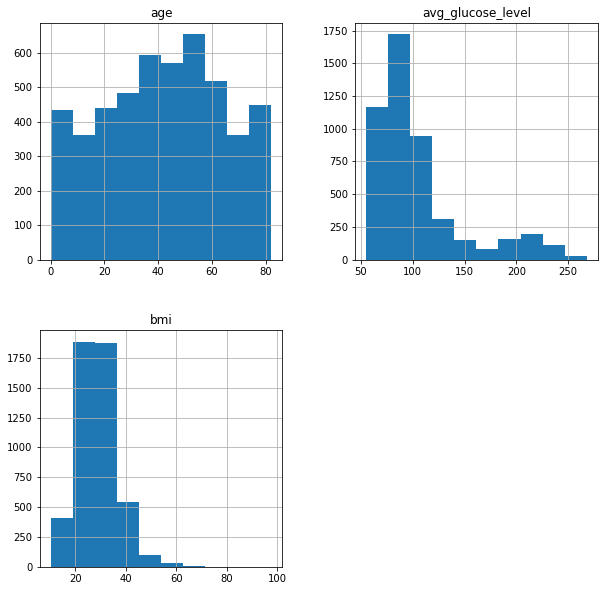

In [107]:
df[df['stroke']=='No'].hist(figsize=(10,10))

## Combined Histograms

#### Stroke w.r.t Age

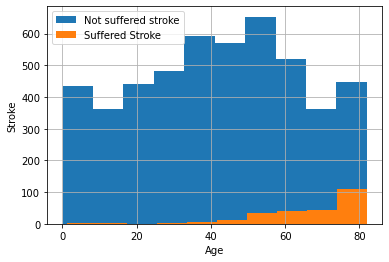

In [108]:
df.loc[df['stroke'] == "No",'age'].hist(label='Not suffered stroke')
df.loc[df['stroke'] == "Yes",'age'].hist(label='Suffered Stroke')
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.legend()

#### Stroke w.r.t BMI

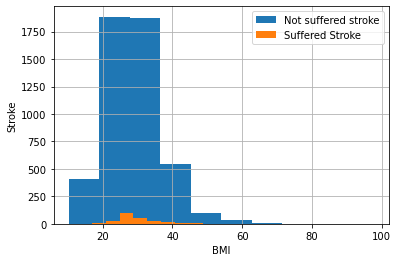

In [109]:
df.loc[df['stroke']== "No",'bmi'].hist(label='Not suffered stroke')
df.loc[df['stroke']== "Yes",'bmi'].hist(label='Suffered Stroke')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.legend()

#### Stroke w.r.t Average glucose level

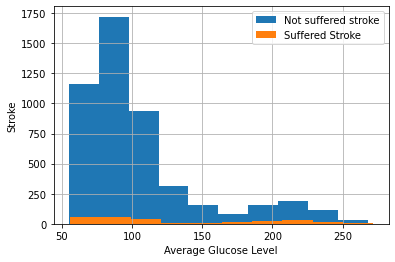

In [110]:
df.loc[df['stroke']== "No",'avg_glucose_level'].hist(label='Not suffered stroke')
df.loc[df['stroke']== "Yes",'avg_glucose_level'].hist(label='Suffered Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Stroke')
plt.legend()

## Bar Graphs

In [111]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [112]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

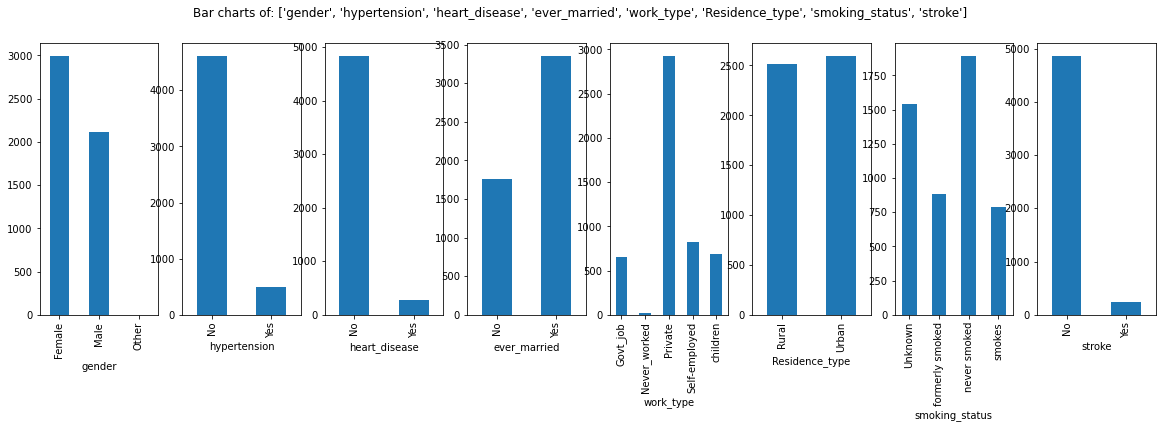

In [113]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke'])

## Bar Graph Bi-variate analysis

<AxesSubplot:ylabel='stroke'>

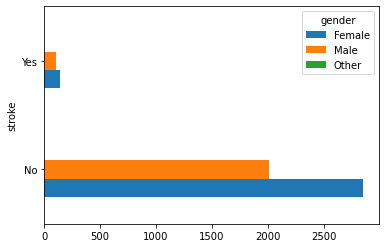

In [114]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='gender',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:ylabel='stroke'>

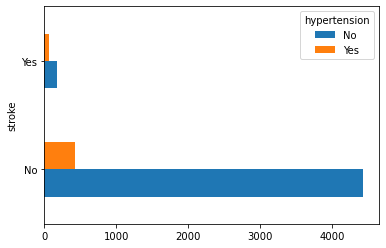

In [115]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='hypertension',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:ylabel='stroke'>

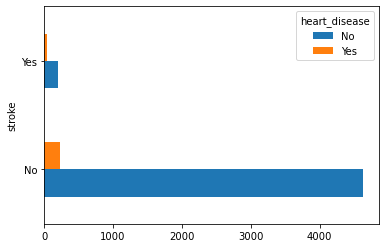

In [116]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='heart_disease',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:ylabel='stroke'>

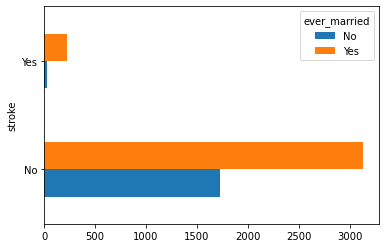

In [117]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='ever_married',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:ylabel='stroke'>

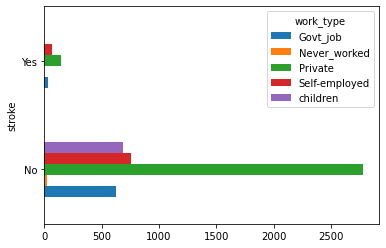

In [118]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='work_type',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:xlabel='stroke'>

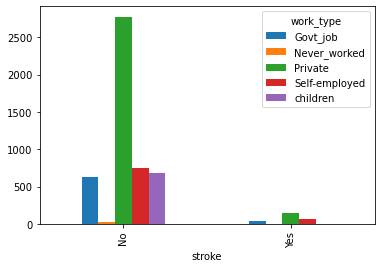

In [120]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='work_type',values='COUNT',aggfunc='sum').plot(kind='bar')

<AxesSubplot:ylabel='stroke'>

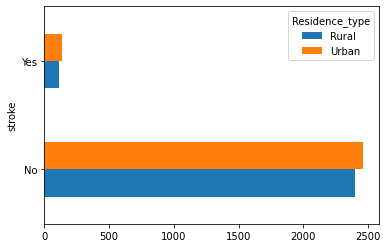

In [121]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='Residence_type',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:ylabel='stroke'>

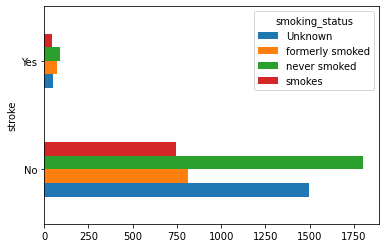

In [122]:
df['COUNT']=1
df.pivot_table(index='stroke',columns='smoking_status',values='COUNT',aggfunc='sum').plot(kind='barh')

## Pie Charts

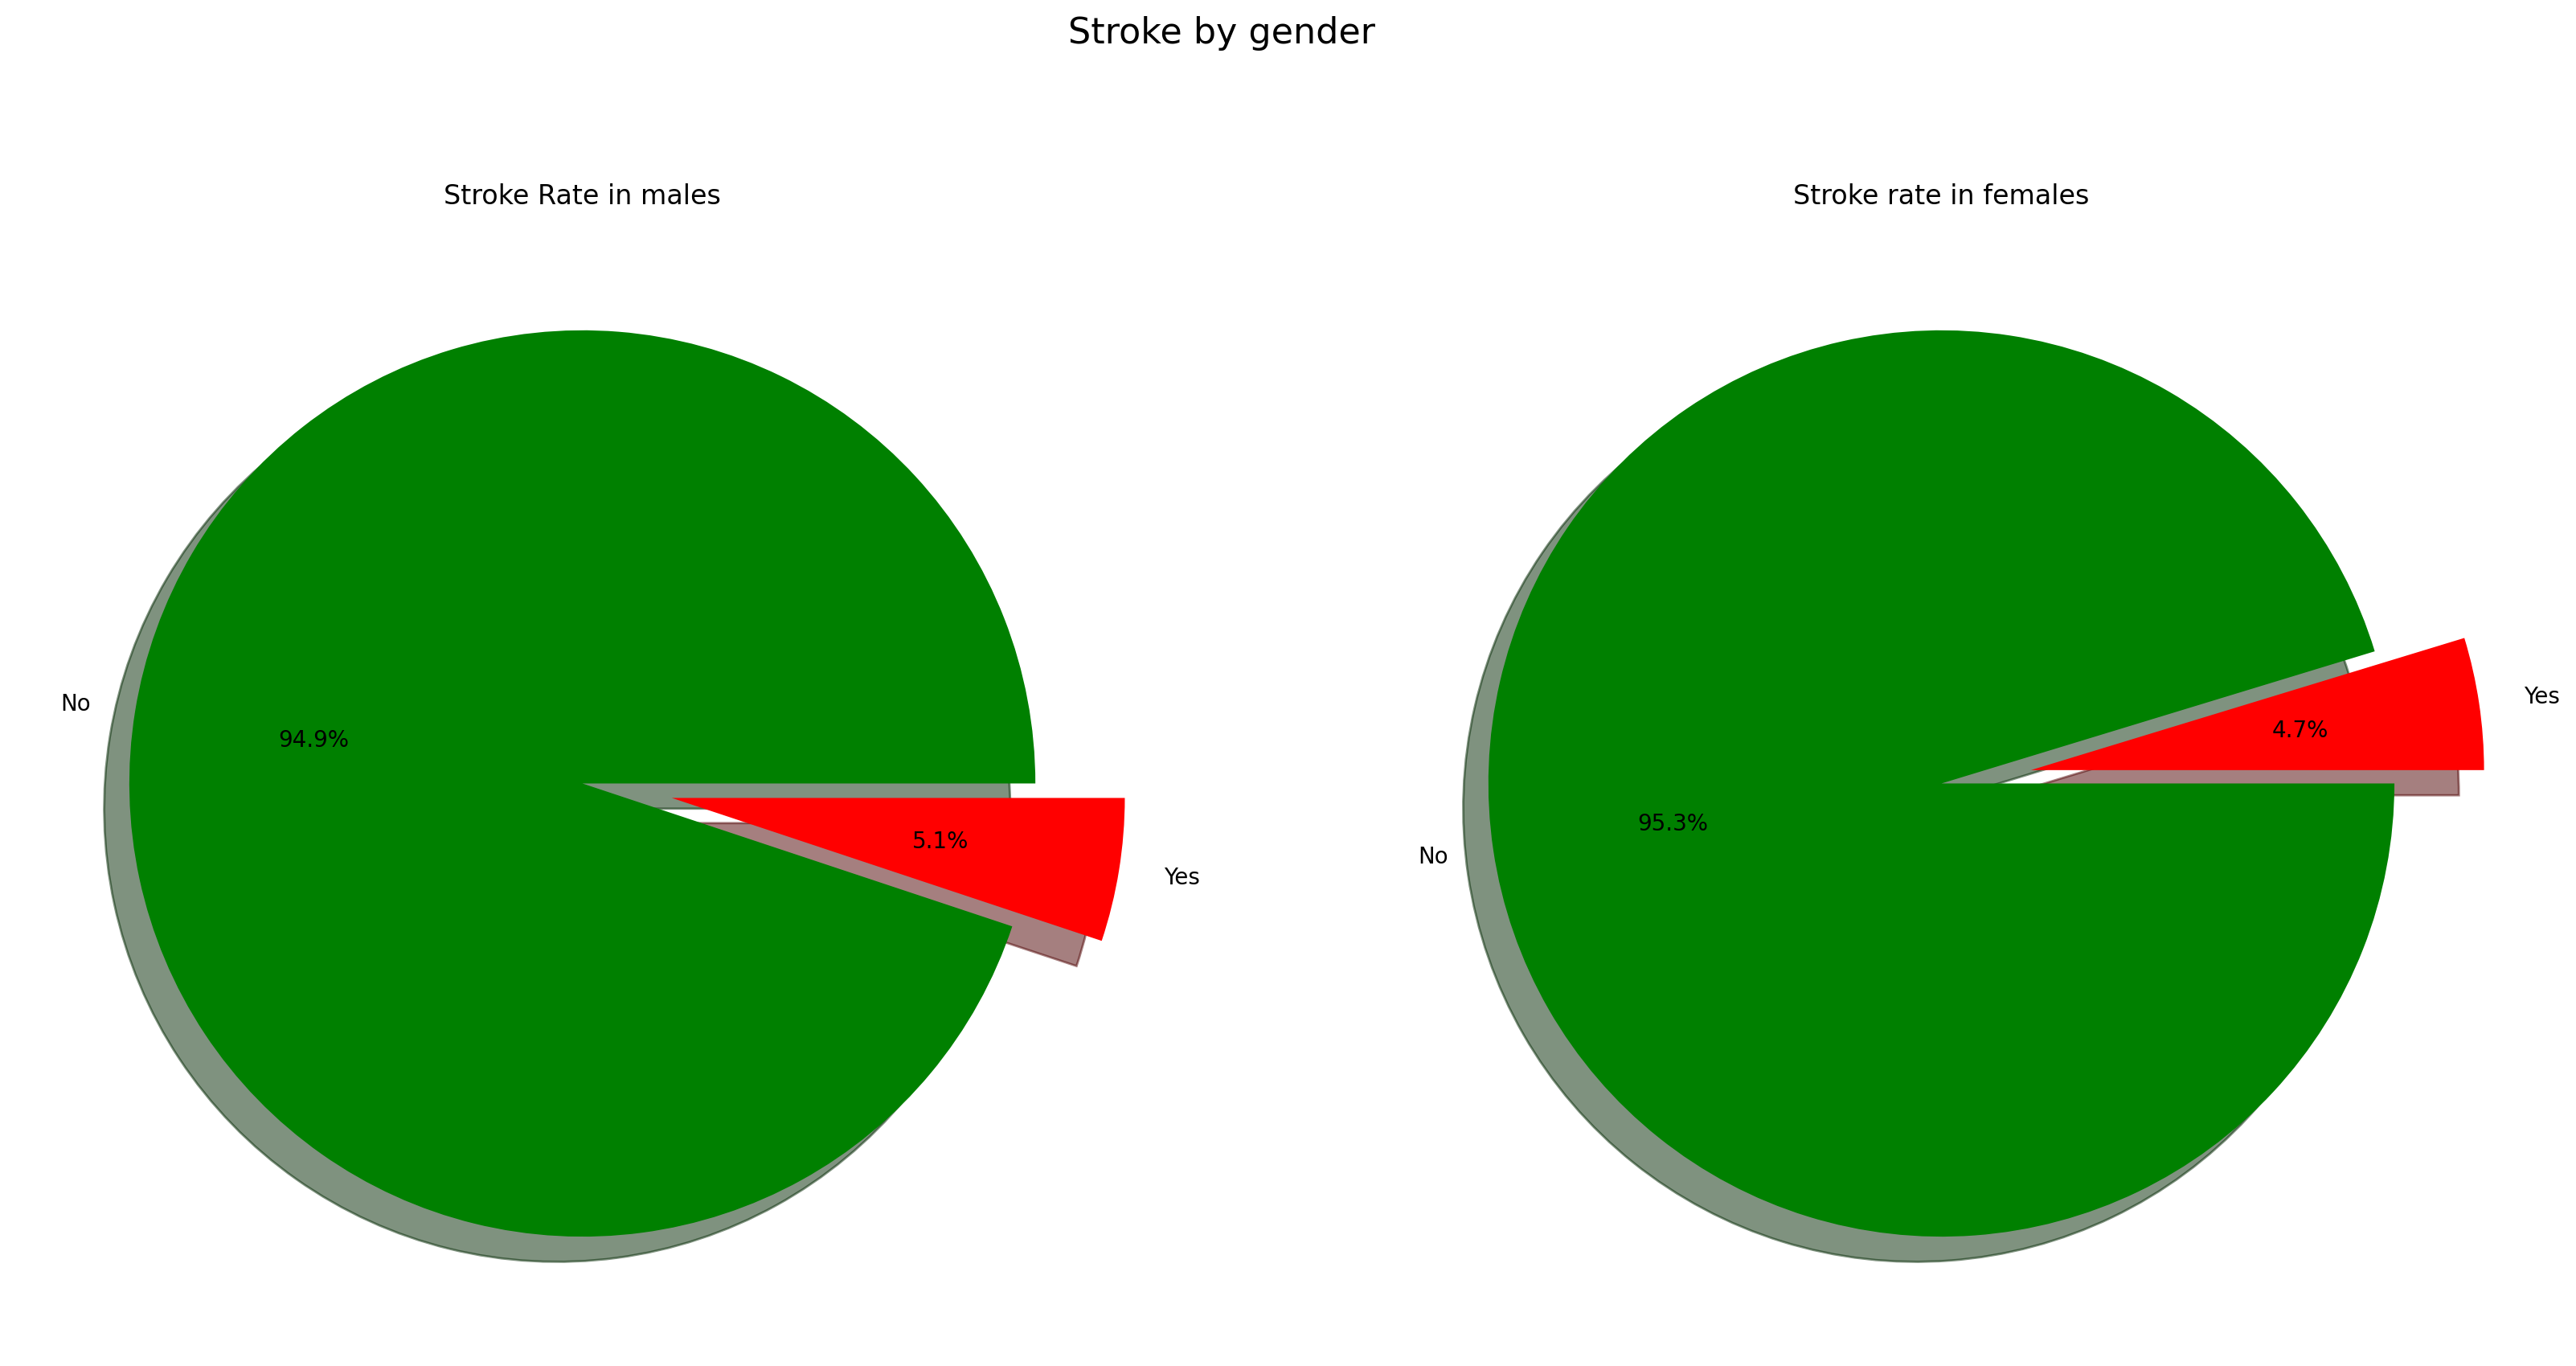

In [123]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'gender' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Stroke by gender', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Male'].values, colors=['g','r'],
           labels=table['Male'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Stroke Rate in males')

axs[1].pie(table['Female'].values, colors=['g','r'],
           labels=table['Female'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Stroke rate in females')

plt.show()

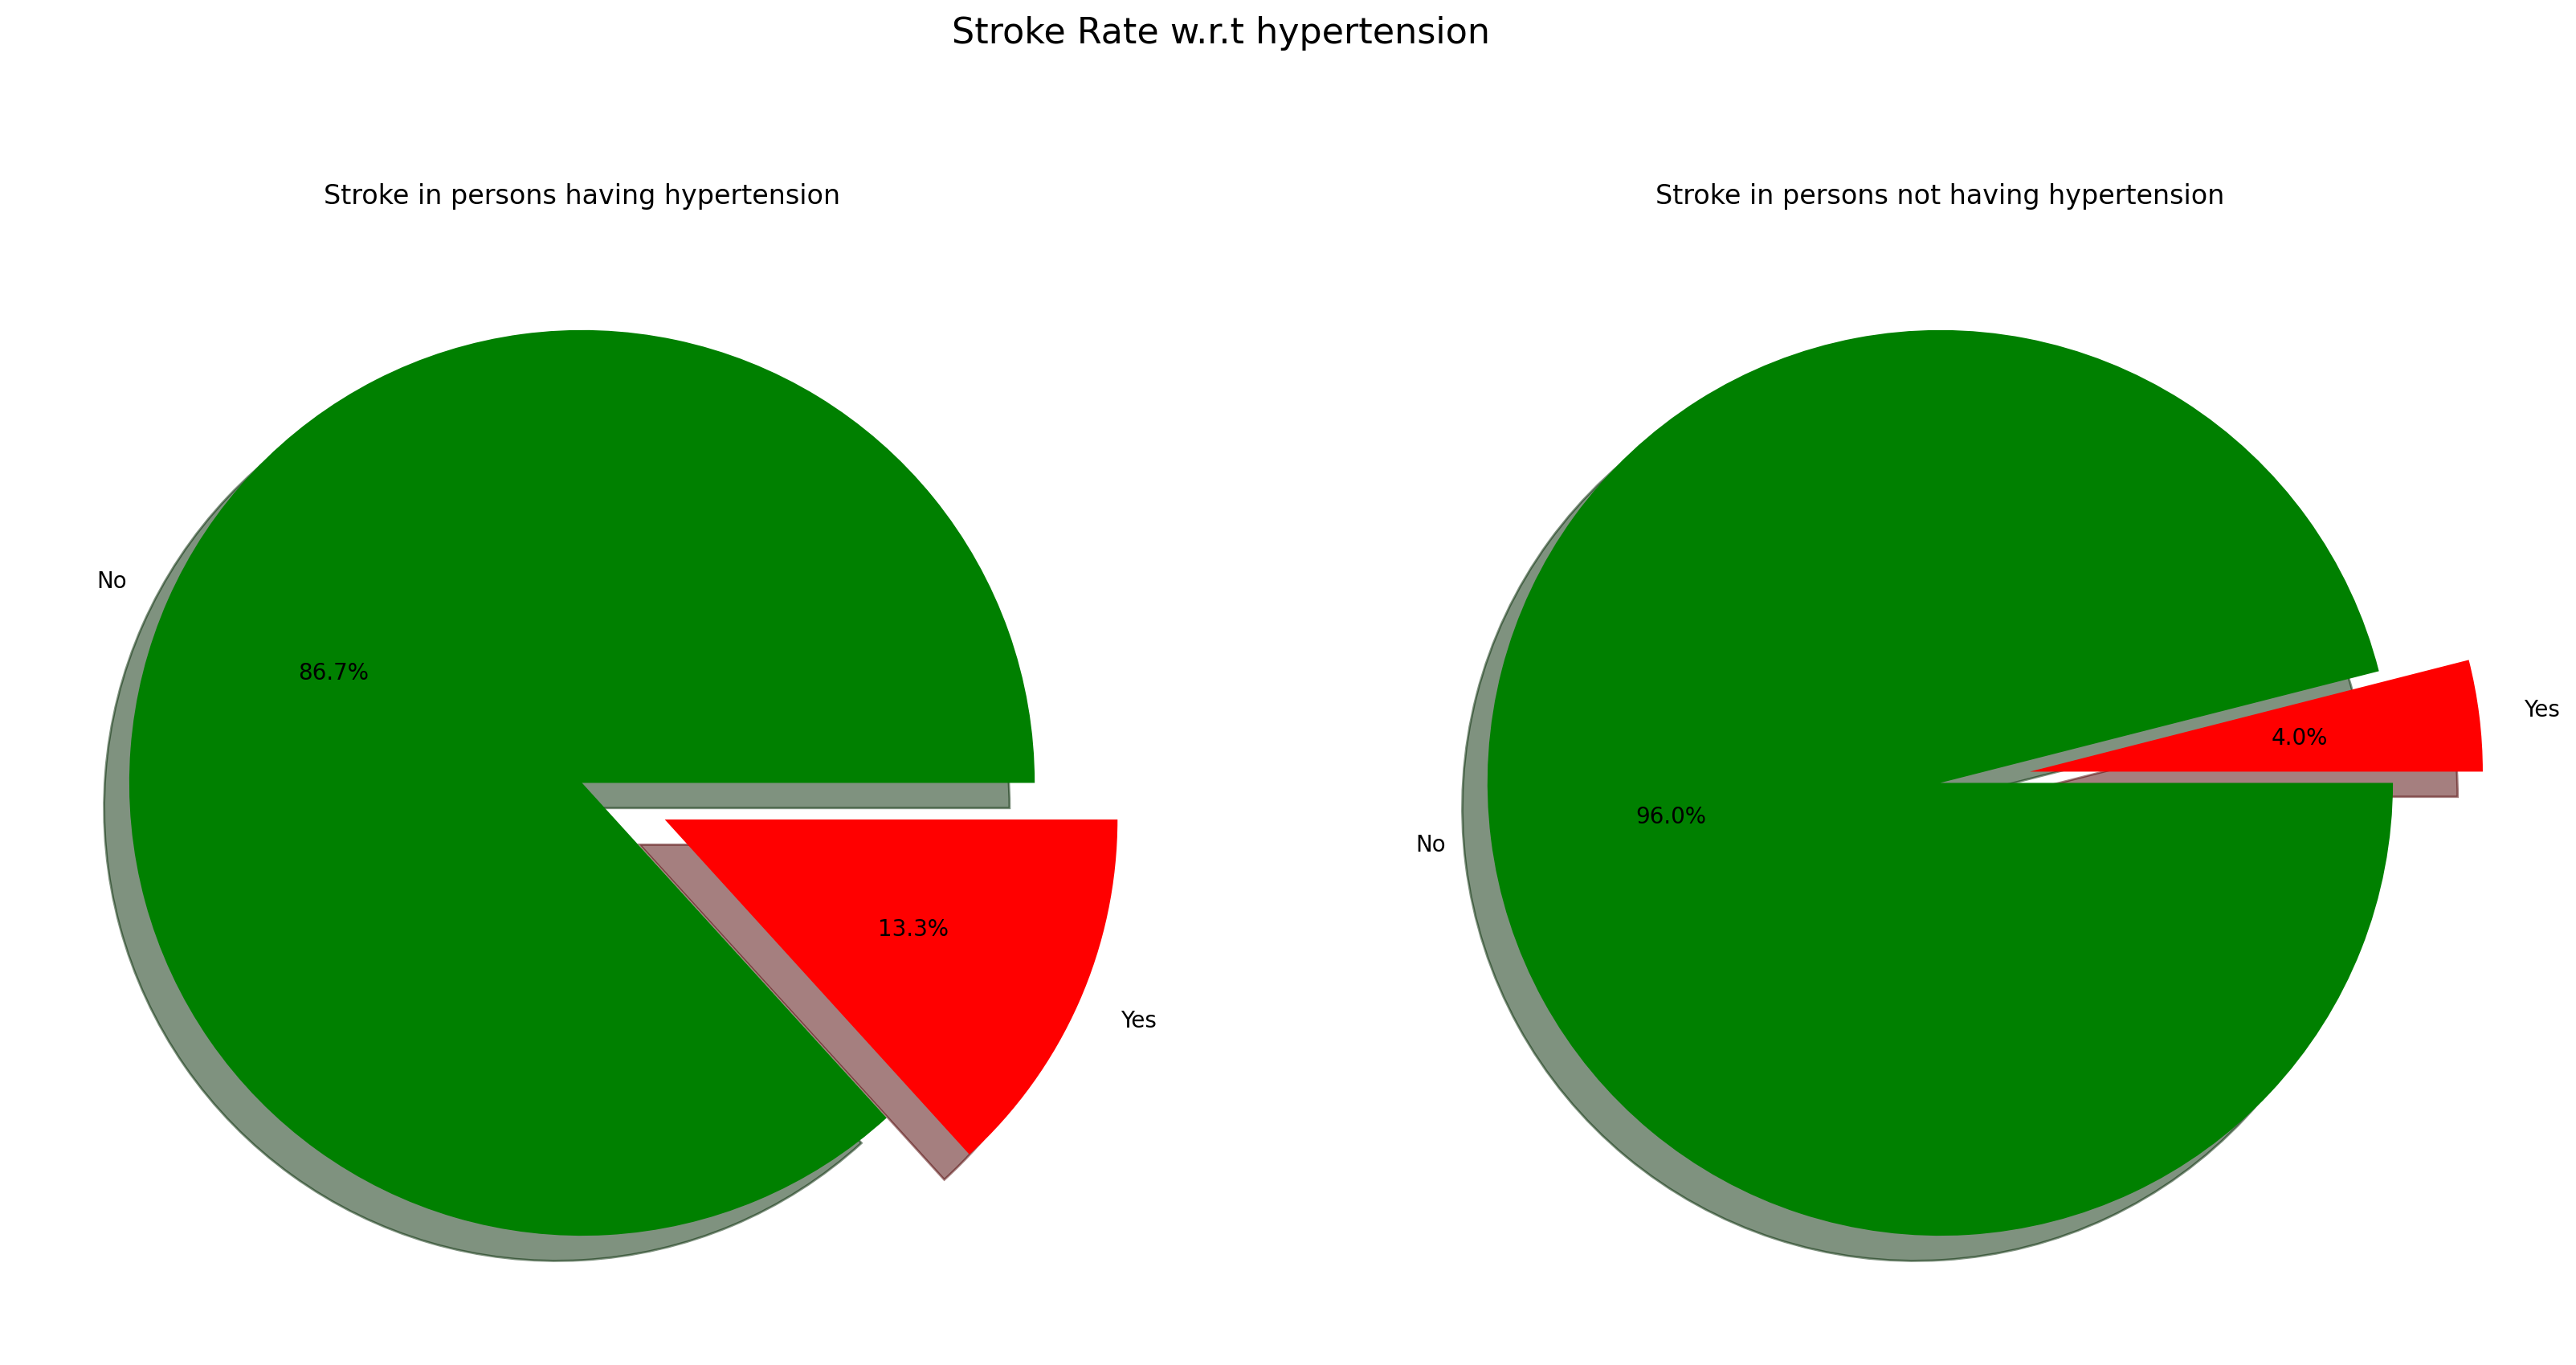

In [124]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'hypertension' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Stroke Rate w.r.t hypertension', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Stroke in persons having hypertension')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Stroke in persons not having hypertension')

plt.show()

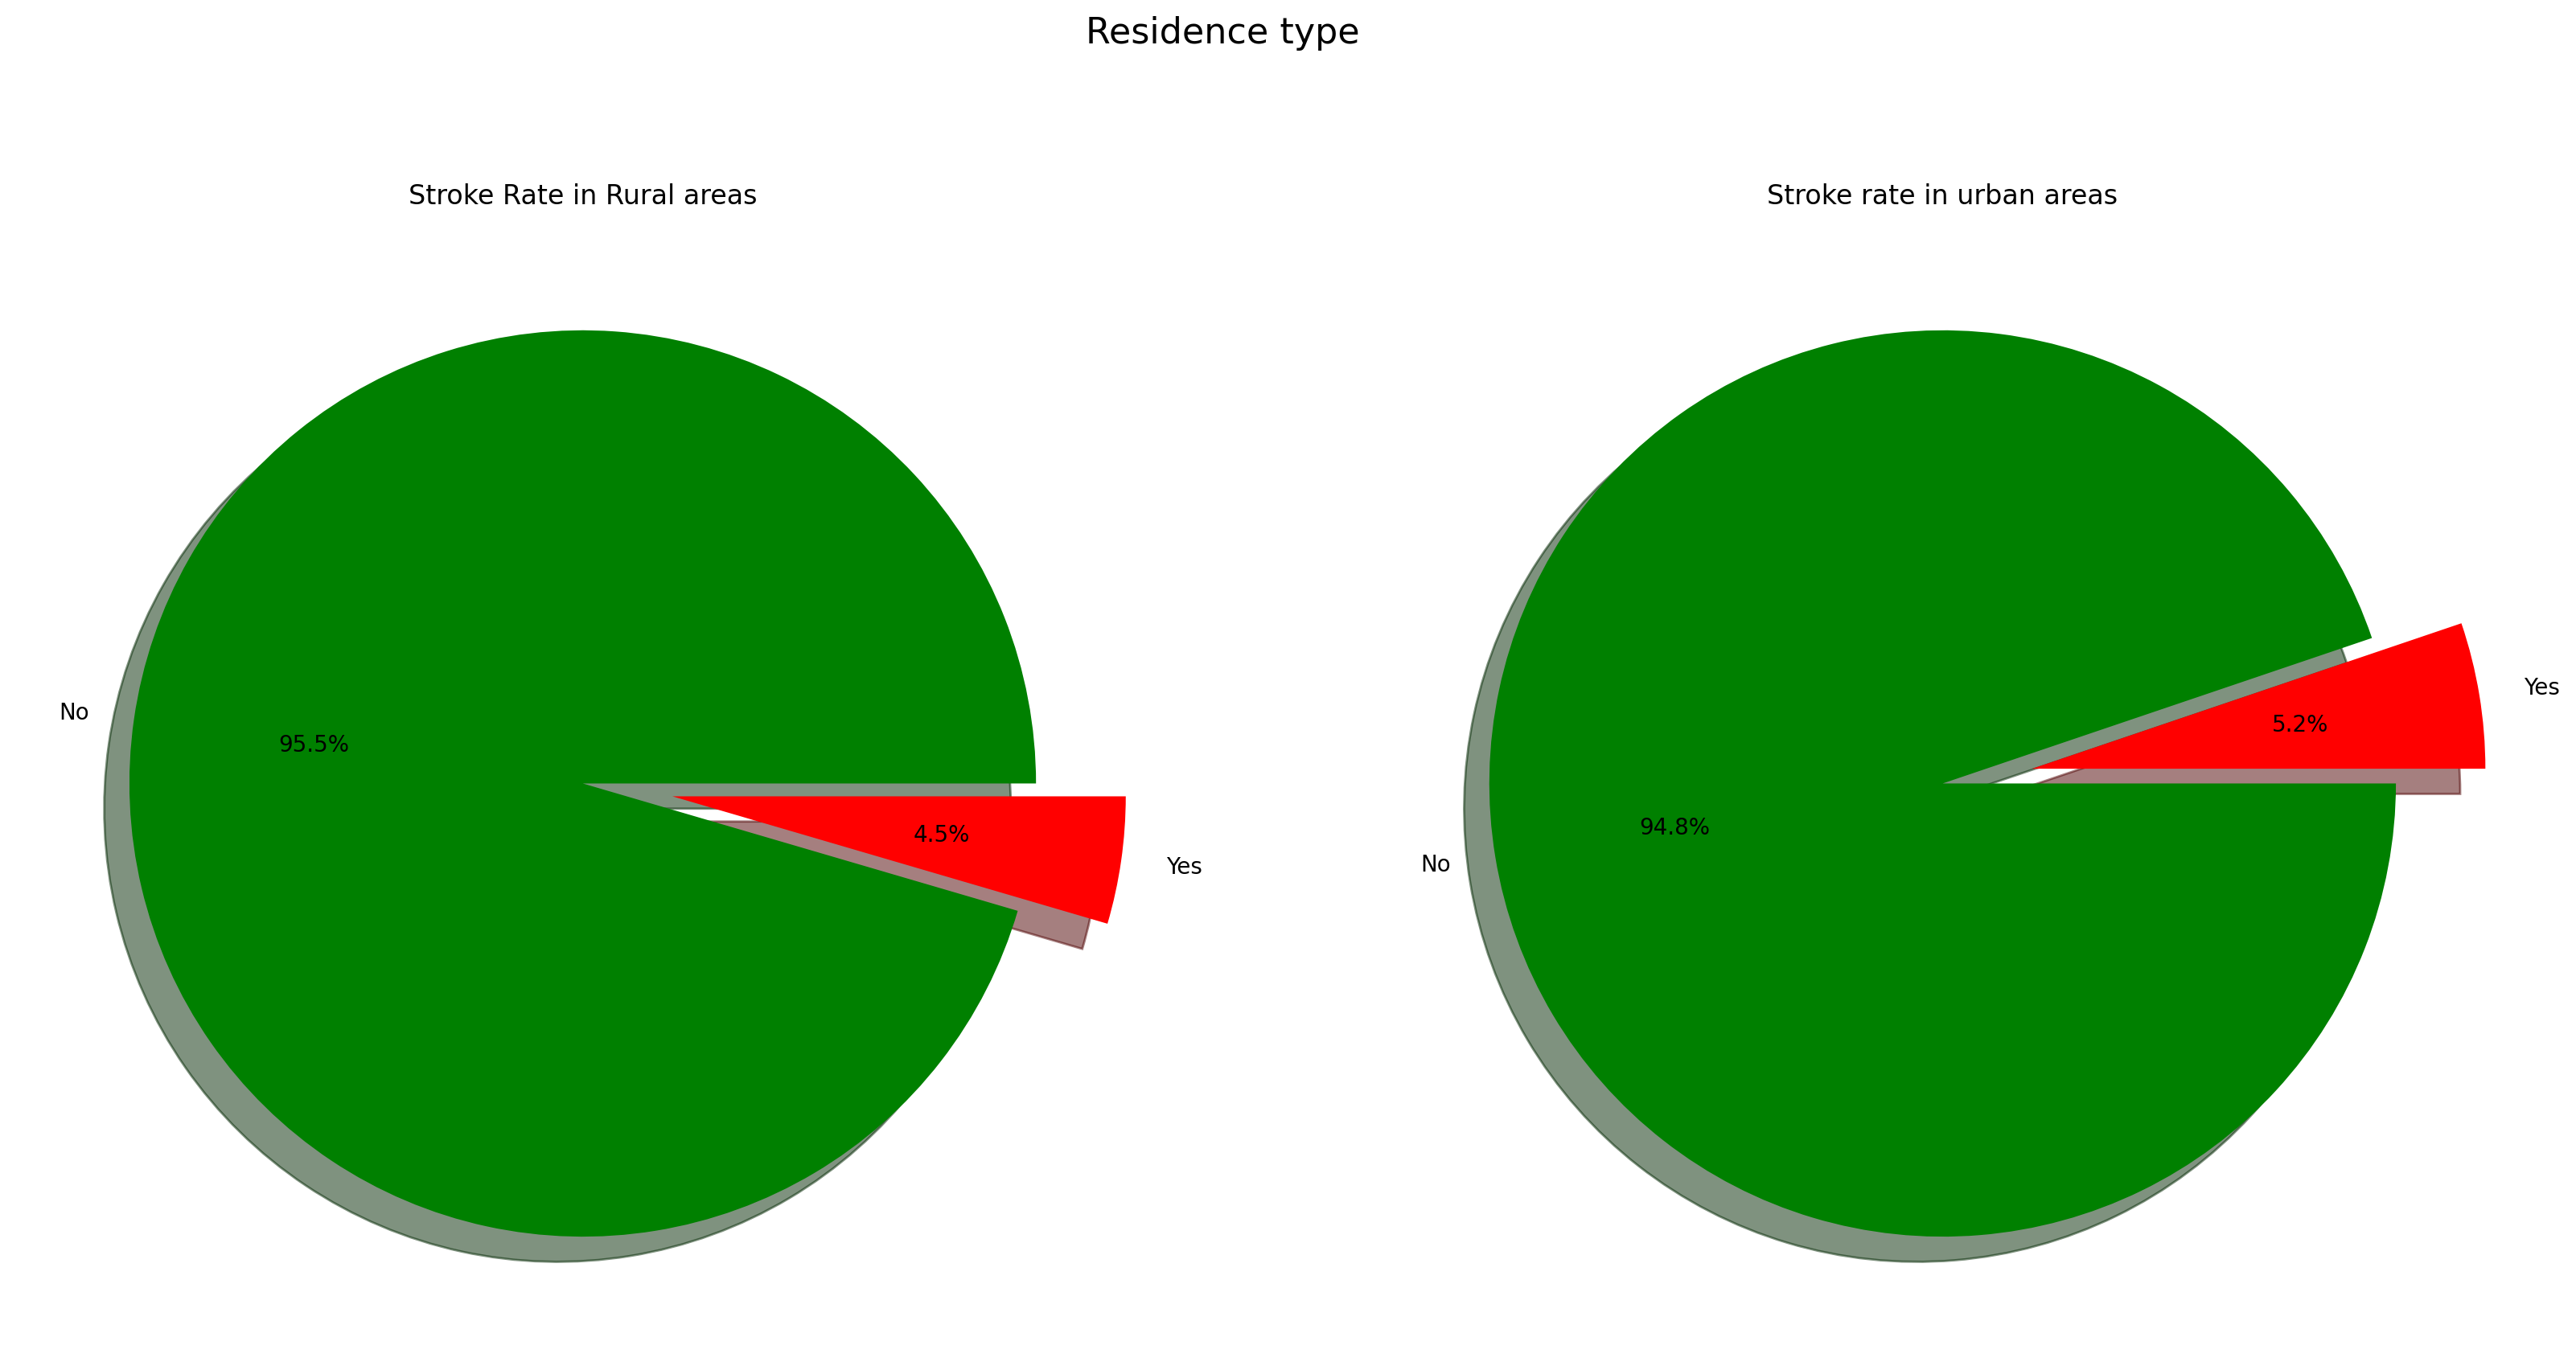

In [132]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'Residence_type' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Residence type', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Rural'].values, colors=['g','r'],
           labels=table['Rural'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Stroke Rate in Rural areas')

axs[1].pie(table['Urban'].values, colors=['g','r'],
           labels=table['Urban'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Stroke rate in urban areas')

plt.show()

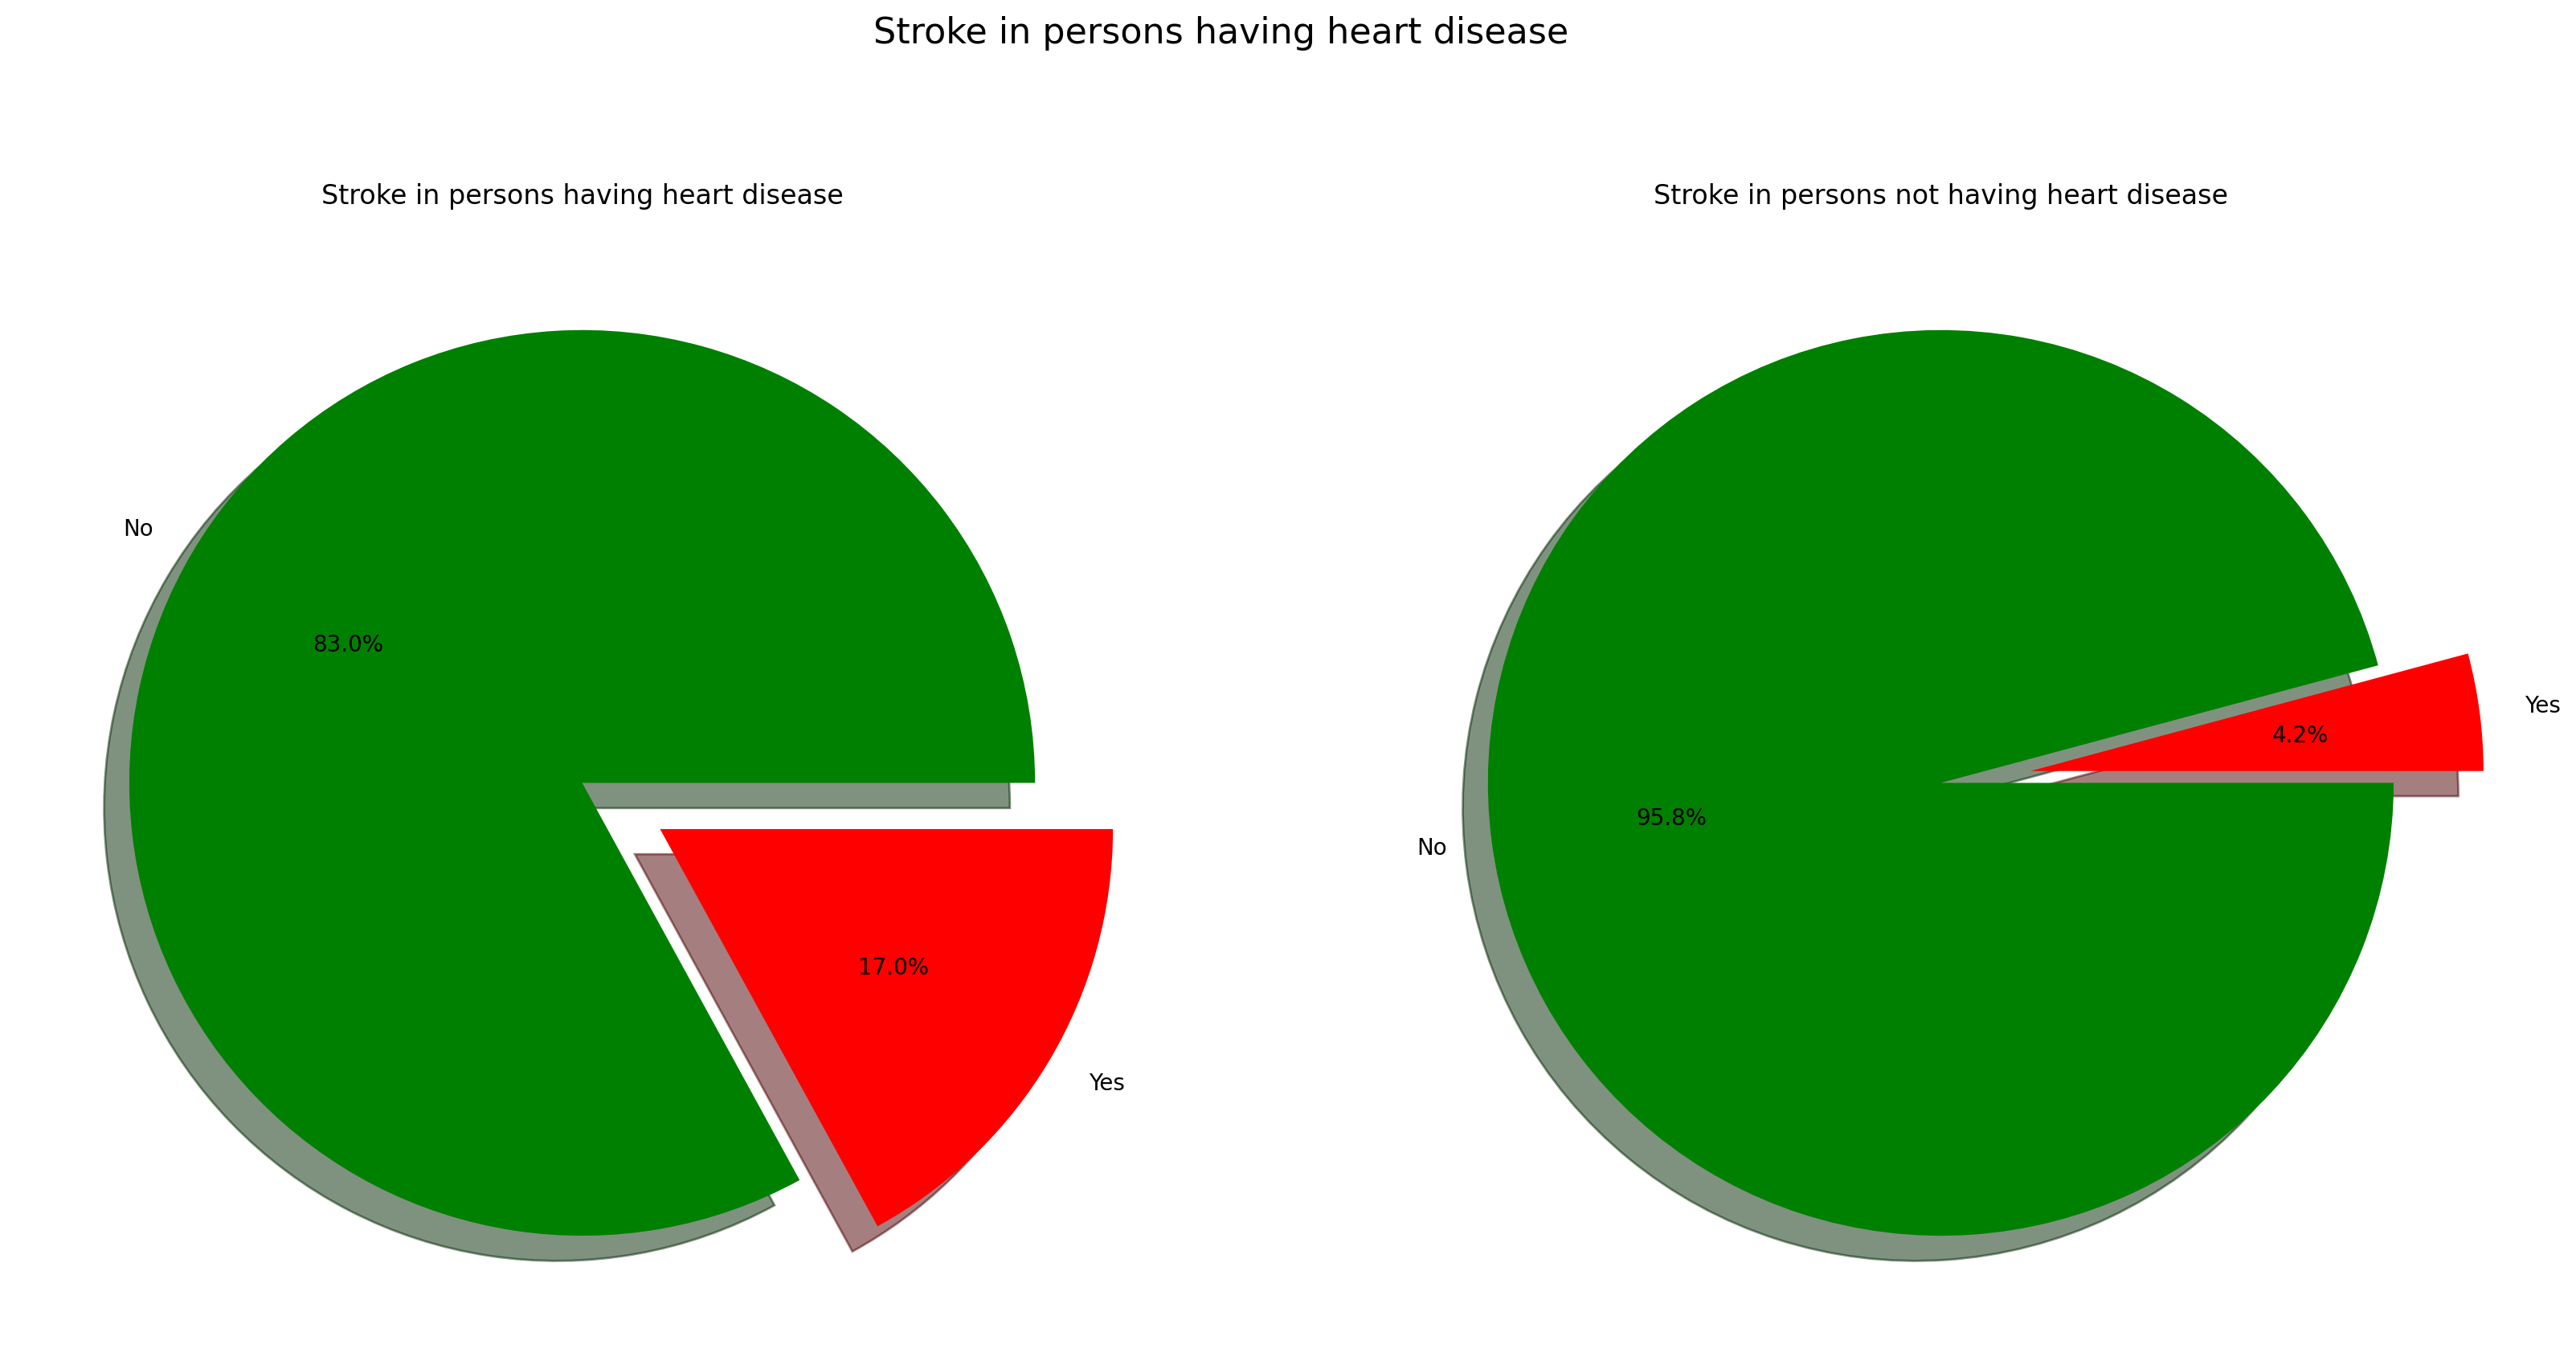

In [126]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'heart_disease' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Stroke in persons having heart disease', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Stroke in persons having heart disease')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Stroke in persons not having heart disease')

plt.show()

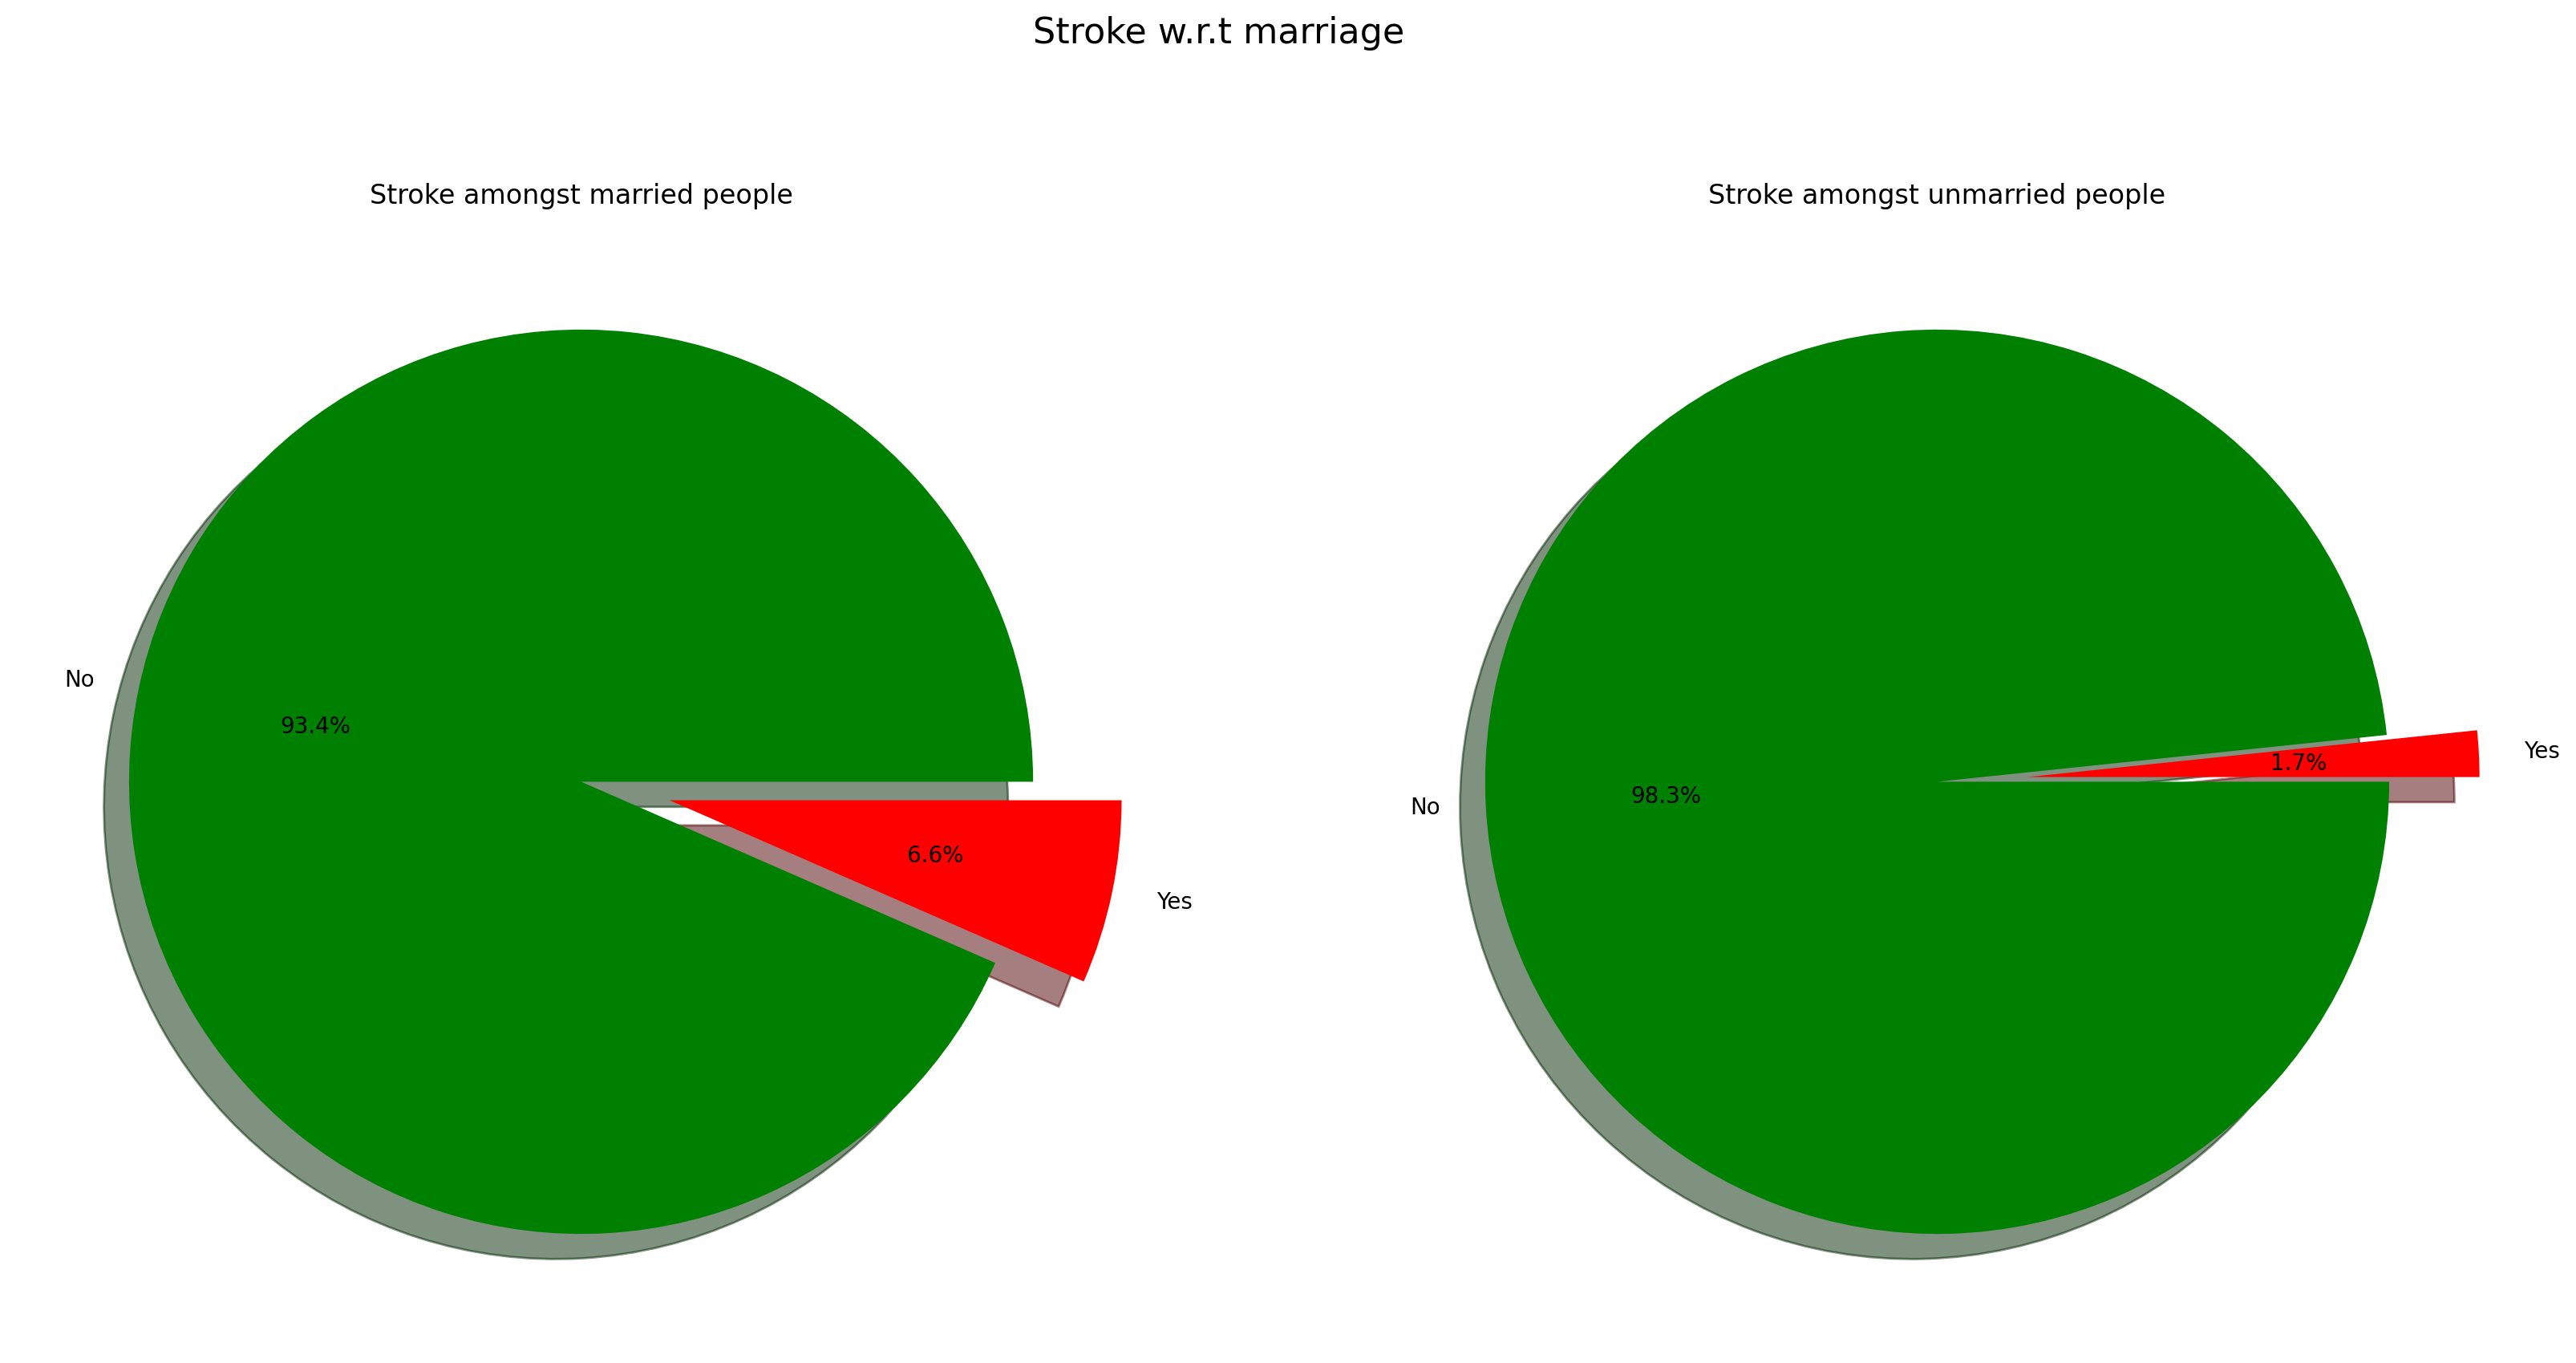

In [128]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'ever_married' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Stroke w.r.t marriage', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Stroke amongst married people')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Stroke amongst unmarried people')

plt.show()

In [133]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'work_type' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10) , dpi = 700)

fig.suptitle('Stroke w.r.t type of work', fontsize=16 )

axs[0].pie(table['Private'].values, colors=['g','r'],
           labels=table['Private'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=False,explode=(0.0,0.2))
axs[0].set_title('Stroke rate pvt sec')

axs[1].pie(table['Self-employed'].values, colors=['g','r'],
           labels=table['Self-employed'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=False,explode=(0.0,0.2))
axs[1].set_title('Stroke rate self employed')


axs[2].pie(table['Govt_job'].values, colors=['g','r'],
           labels=table['Govt_job'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=False,explode=(0.0,0.2))
axs[2].set_title('Stroke rate govt jobs')

axs[3].pie(table['children'].values, colors=['g','r'],
           labels=table['children'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=False,explode=(0.0,0.2))
axs[3].set_title('Stroke rate amongst children')

plt.show()

In [131]:
df['COUNT'] = 1
table=df.pivot_table( index = 'stroke' , columns = 'smoking_status' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10) , dpi = 700)

fig.suptitle('Stroke rate w.r.t smokers', fontsize=16 )

axs[0].pie(table['formerly smoked'].values, colors=['g','r'],
           labels=table['formerly smoked'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=False,explode=(0.0,0.2))
axs[0].set_title('Stroke rate in former smokers')

axs[1].pie(table['never smoked'].values, colors=['g','r'],
           labels=table['never smoked'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=False,explode=(0.0,0.2))
axs[1].set_title('Stroke rate in people who never smoked')


axs[2].pie(table['smokes'].values, colors=['g','r'],
           labels=table['smokes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=False,explode=(0.0,0.2))
axs[2].set_title('Stroke rate in smokers')

axs[3].pie(table['Unknown'].values, colors=['g','r'],
           labels=table['Unknown'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=False,explode=(0.0,0.2))
axs[3].set_title('Stroke rate in unknown smoking status')


#axs[4].pie(table['Notworked'].values, colors=['g','r'],
 #          labels=table['Notworked'].index ,
  #         autopct='%0.1f%%',
#counterclock=False, shadow=True,explode=(0.0,0.2))
#axs[4].set_title('Stroke rate pple who never worked ')


plt.show()

## Observations

- Risk of stroke increases with age 
- Stroke is higher amongst married people when compared to unmarried people
- Stroke rate is considerably high in people with heart diseases when compared to people without heart diseases
- Stroke rate is higher amongst people having hypertension when compared to people without hyper tension
- Stroke is more amongst people with glucose levels less than 100 and glucose levels more than 150
- Stroke rate is extremely low amongst children 
- Stroke rate does not vary much with gender and residence_type
- Not much variation seen in stroke w.r.t smoking